In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [97]:
train_data = pd.read_csv("./train.csv")

In [98]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [100]:
train_data.nunique()

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

In [101]:
# checking duplicate data
train_data.duplicated().sum()

0

In [102]:
# checking missing values
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### EDA

In [103]:
class Visualization:
    def __init__(self, df):
        self.df = df
        
    def format_func(self, value, tick_number):
        if value >= 1000000:
            return f'{value / 1000000:.1f}M'
        elif value >= 1000:
            return f'{value / 1_000:.1f}K'
        else:
            return str(int(value))
    
    def combined_plot(self, cols, plt_fn, fig_size):
        n_col = 3
        n_row = (len(cols) + n_col - 1) // n_col
        fig, axes = plt.subplots(n_row, n_col, figsize=fig_size)
        axes = axes.flatten()
        
        for i, col in enumerate(cols):
            plt_fn(axes[i], col)
            
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    
    def bar_plot(self, ax, col):
        df_col = self.df[col].value_counts()
        palette = sns.color_palette("Paired", len(df_col))
        colors = [palette[i] for i in range(len(df_col))]

        ax.bar(df_col.index, df_col.values, color = colors)
        ax.set_title(f"{col} Frequency")
        ax.set_xlabel(f"{col}")
        ax.set_ylabel(f"Frequency")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_func))
        
    def hist_plot(self, ax, col):
        palette = sns.color_palette("tab10")
        ax.hist(self.df[col], color=palette[2])
        ax.set_title(f"{col} Histogram")
        ax.set_xlabel(f"{col}")
        ax.set_ylabel(f"Frequency")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_func))
    
    def box_plot(self, ax, col):
        palette = sns.color_palette("flare")
        sns.boxplot(data=self.df, x=col, ax=ax, palette=palette)
        ax.set_title(f"{col} Box Plot")
    
    def pie_chart(self, ax, col):
        df_col = self.df[col].value_counts()
        palette = sns.color_palette("Paired", len(df_col))
        ax.pie(df_col.values, labels=df_col.index, autopct='%1.1f%%', colors=palette)
        ax.set_title(f"{col} Distribution")

In [104]:
gen_viz = Visualization(train_data)

In [105]:
nunq = train_data.nunique()
box_cols = nunq[nunq < 10].index

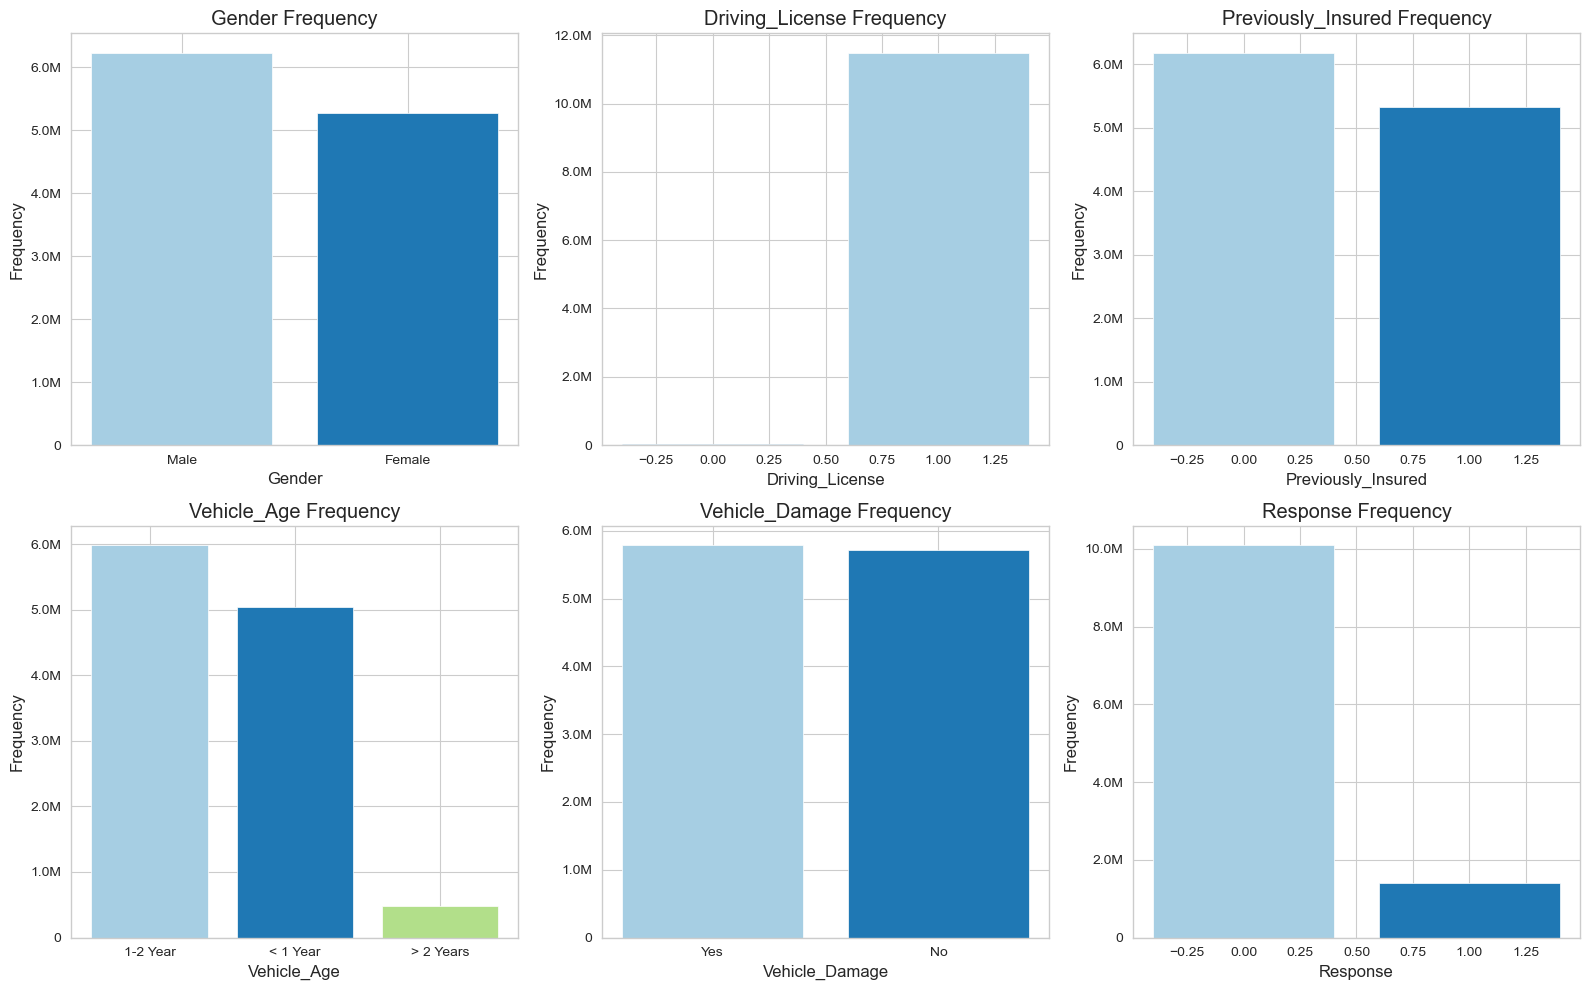

In [106]:
gen_viz.combined_plot(box_cols, gen_viz.bar_plot, (16, 10))

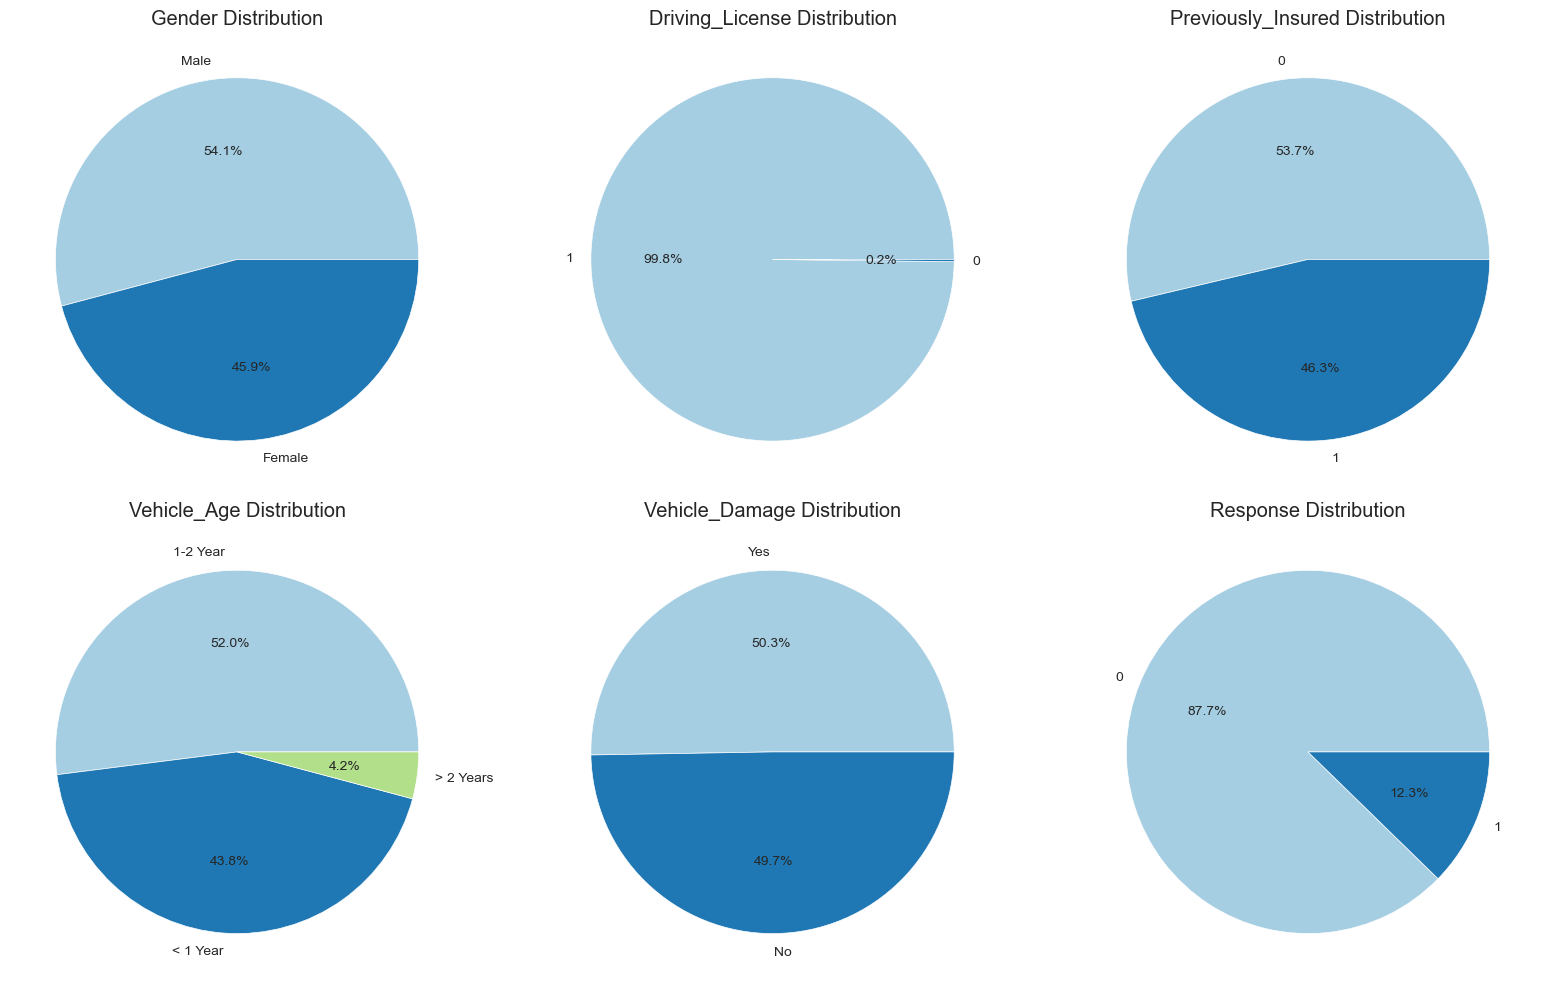

In [107]:
gen_viz.combined_plot(box_cols, gen_viz.pie_chart, (16, 10))

The data seems imbalanced so we need to make it balanced in-terms of the `Response` label.

In [108]:
hist_plot_cols = ['Age', 'Region_Code', 'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

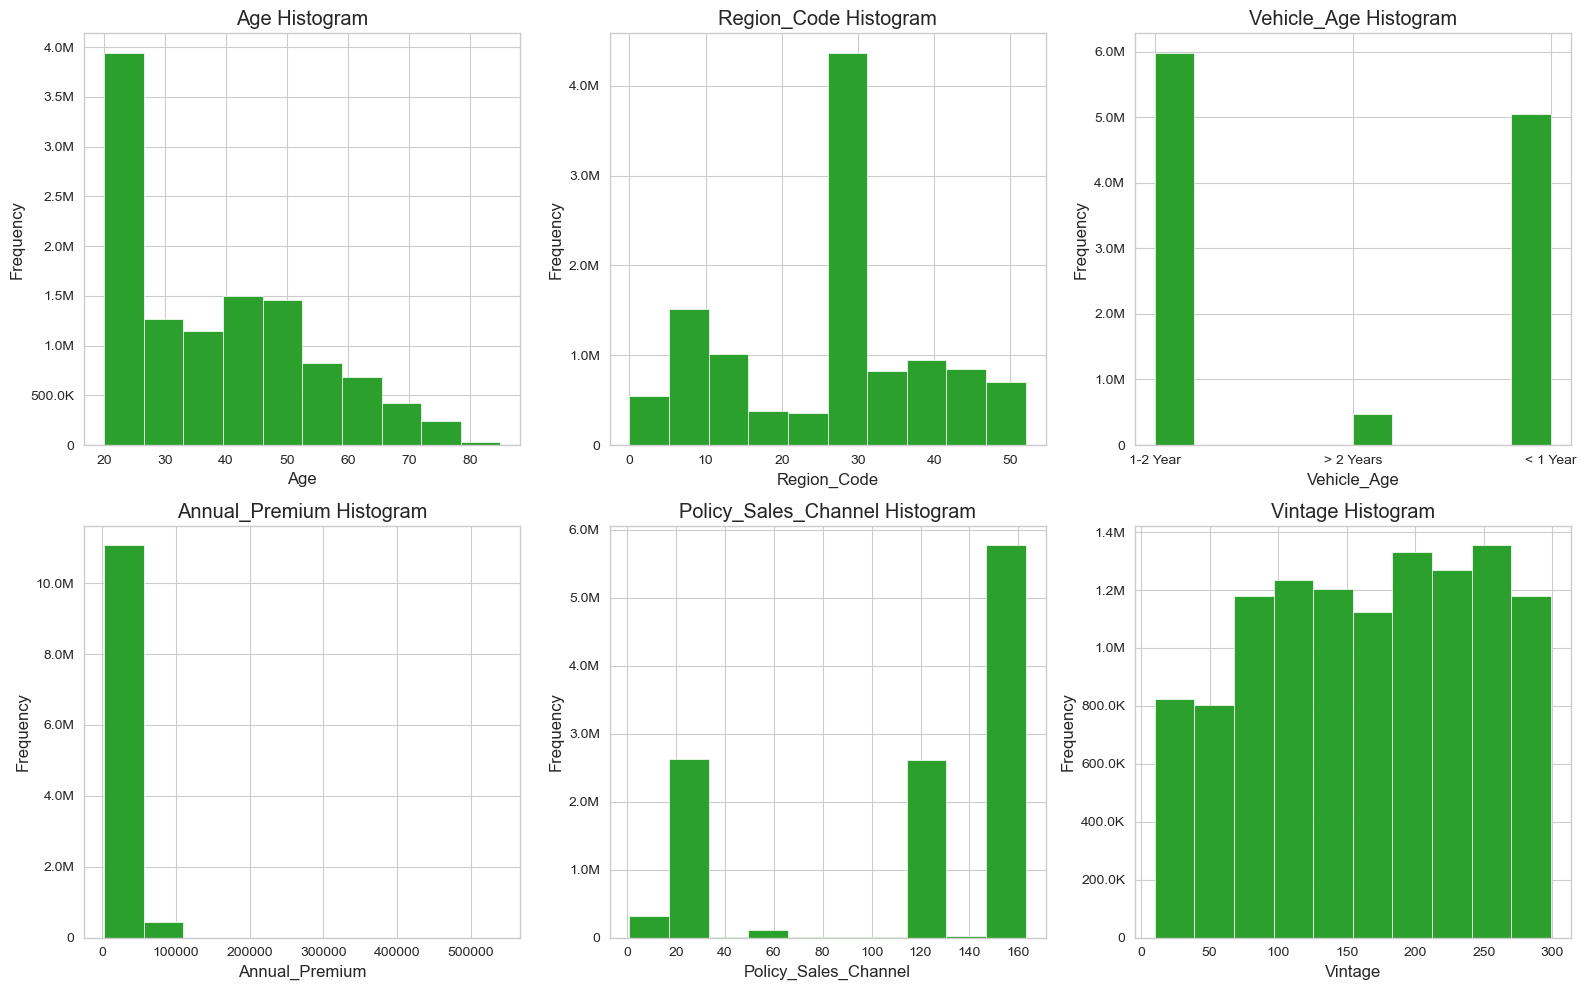

In [109]:
gen_viz.combined_plot(hist_plot_cols, gen_viz.hist_plot, (16, 10))

In [110]:
box_plt_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

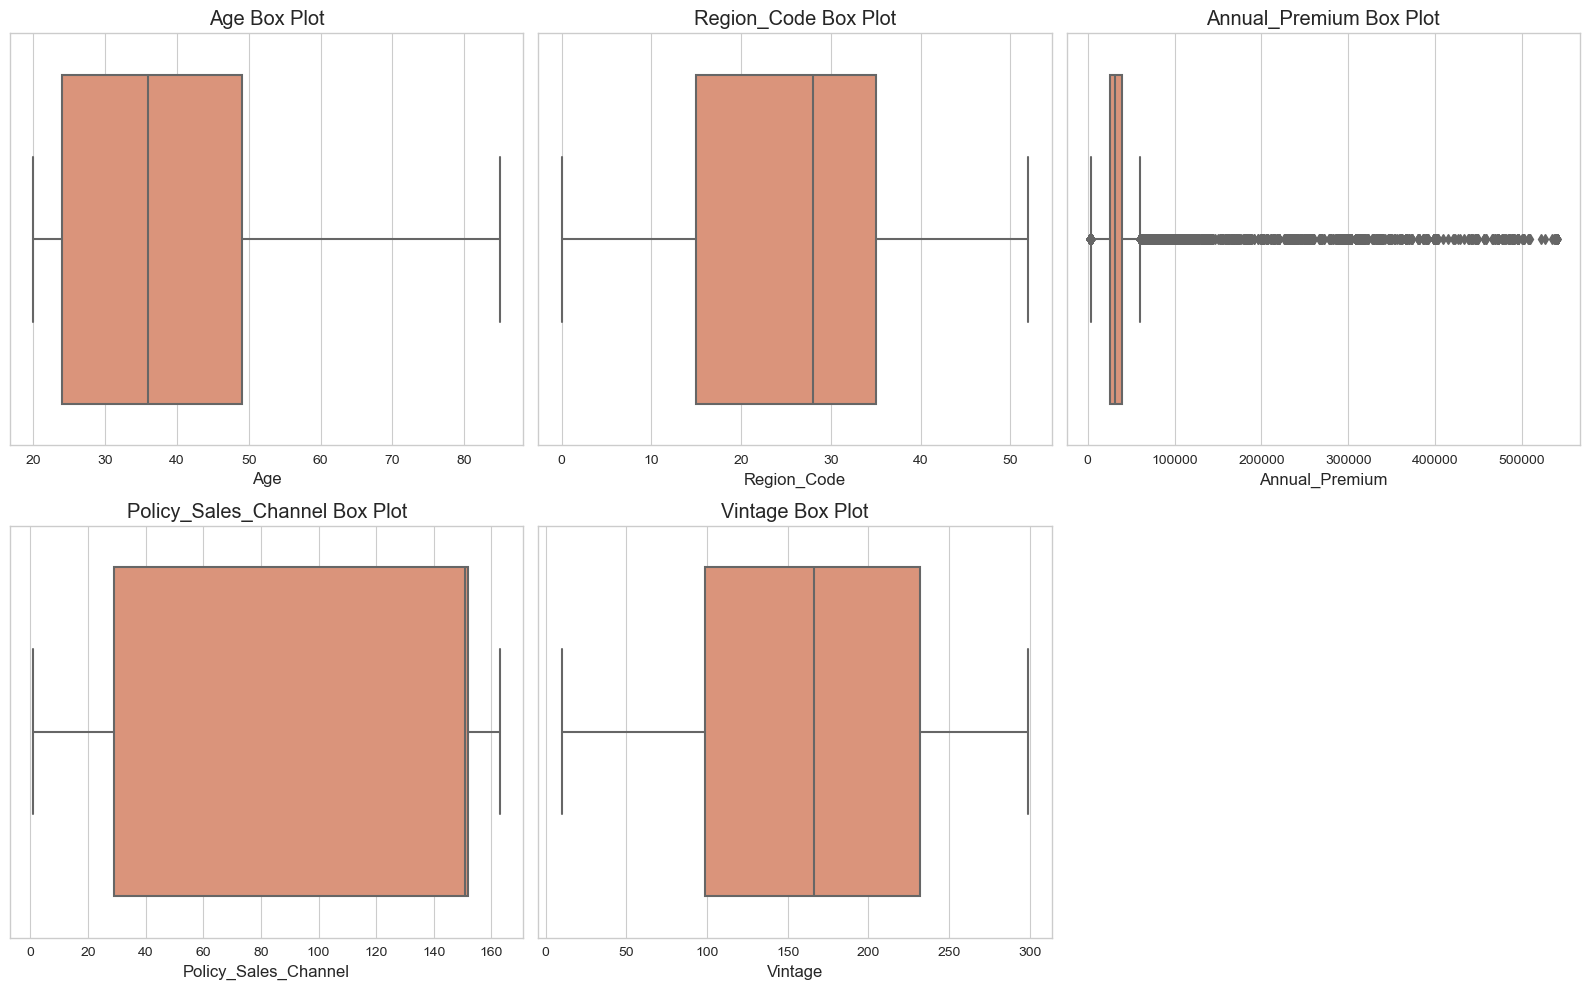

In [111]:
gen_viz.combined_plot(box_plt_cols, gen_viz.box_plot, (16, 10))

### Feature Engineering (Data Pre-processing)